## Exploration of women's football data

### Import libraries and dataset

In [10]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool
from bokeh.transform import factor_cmap
%matplotlib inline

In [11]:
df_players = pd.read_csv('all_players.csv')
df_players.head()

,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,Gls,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerialDuels_Won,AerialDuels_Lost,Cmp
0,Teresa Abilleira,es ESP,MF,Real Madrid,22-333,2000.0,9,7,648,3,...,0.0,18.0,15.0,0.0,0.0,0,52.0,4.0,5.0,0.0
1,Jessica Aby,ci CIV,"FW,MF",Alavés,24-175,1998.0,10,4,383,1,...,2.0,3.0,7.0,0.0,0.0,0,21.0,6.0,11.0,0.0
2,Charity Adule,NaN,FW,Alhama,29-031,1993.0,1,0,14,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,2.0,0.0
3,Júlia Aguado,NaN,"FW,MF",Levante,22-220,2000.0,5,0,50,3,...,2.0,0.0,0.0,0.0,0.0,0,2.0,1.0,0.0,0.0
4,Yolanda Aguirre,es ESP,GK,Sevilla,24-046,1998.0,4,4,360,0,...,0.0,0.0,0.0,0.0,0.0,1,2.0,1.0,1.0,0.0


In [12]:
print(df_players.columns.tolist())


['Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', 'MP', 'Starts', 'Min', 'Gls', 'Ast', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'Player_id', 'Squad_id', 'Sh', 'SoT', 'G_by_Sh', 'G_by_SoT', 'Dist', 'FK', 'npxG_by_Sh', 'G-xG', 'np:G-xG', 'Total_Cmp', 'Total_Att', 'Total_TotDist', 'Total_PrgDist', 'xA', 'A-xAG', 'KP', 'LastThird', 'PPA', 'CrsPA', 'Prog', 'SCA', 'SCA_PassLive', 'SCA_PassDead', 'SCA_Drib', 'SCA_Sh', 'SCA_Fld', 'SCA_Def', 'GCA', 'GCA_PassLive', 'GCA_PassDead', 'GCA_Drib', 'GCA_Sh', 'GCA_Fld', 'GCA_Def', 'Tackles_Tkl', 'Tackles_TklW', 'Tackles_Def3rd', 'Tackles_Mid3rd', 'Tackles_Att3rd', 'VsDribbles_Tkl', 'VsDribbles_Att', 'VsDribbles_Past', 'Blocks_Blocks', 'Blocks_Sh', 'Blocks_Pass', 'Int', 'Tkl_plus_Int', 'Clr', 'Err', 'Touches_Touches', 'Touches_DefPen', 'Touches_Def3rd', 'Touches_Mid3rd', 'Touches_Att3rd', 'Touches_AttPen', 'Touches_Live', 'Dribbles_Succ', 'Dribbles_Att', 'Dribbles_Mis', 'Dribbles_Dis', 'Receiving_Rec', 'Receiving_Prog', 'Mn_by_MP', 

### Cleaning data

In [13]:
df_players.dropna(inplace = True, subset = 'Born', how = 'any', axis = 0)

df_players['Born'] = df_players['Born'].astype('int')

df_players['Nation'] = df_players['Nation'].str[3:]
df_players['Age_Yrs'] = df_players['Age'].str[:2]

df_players.head()

,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,Gls,...,Crs,TklW,PKwon,PKcon,OG,Recov,AerialDuels_Won,AerialDuels_Lost,Cmp,Age_Yrs
0,Teresa Abilleira,ESP,MF,Real Madrid,22-333,2000,9,7,648,3,...,18.0,15.0,0.0,0.0,0,52.0,4.0,5.0,0.0,22
1,Jessica Aby,CIV,"FW,MF",Alavés,24-175,1998,10,4,383,1,...,3.0,7.0,0.0,0.0,0,21.0,6.0,11.0,0.0,24
2,Charity Adule,NaN,FW,Alhama,29-031,1993,1,0,14,0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,2.0,0.0,29
3,Júlia Aguado,NaN,"FW,MF",Levante,22-220,2000,5,0,50,3,...,0.0,0.0,0.0,0.0,0,2.0,1.0,0.0,0.0,22
4,Yolanda Aguirre,ESP,GK,Sevilla,24-046,1998,4,4,360,0,...,0.0,0.0,0.0,0.0,1,2.0,1.0,1.0,0.0,24


In [14]:
df_players['Gls_per_90'] = (df_players['Gls'] / (df_players['Min'] / 90))
df_players['xG_per_90'] = (df_players['xG'] / (df_players['Min'] / 90))
df_players['npxG_per_90'] = (df_players['xG'] / (df_players['Min'] / 90))
df_players['Ast_per_90'] = (df_players['Ast'] / (df_players['Min'] / 90))
df_players['SoG_per_90'] = (df_players['Sh'] / (df_players['Min'] / 90))
df_players['SoT_per_90'] = (df_players['SoT'] / (df_players['Min'] / 90))


In [15]:
df_forwards = df_players.loc[(df_players['Pos'].str.contains('FW'))]
df_forwards = df_forwards.loc[(df_players['Min'] >= 200)]
df_forwards.shape

(375, 118)

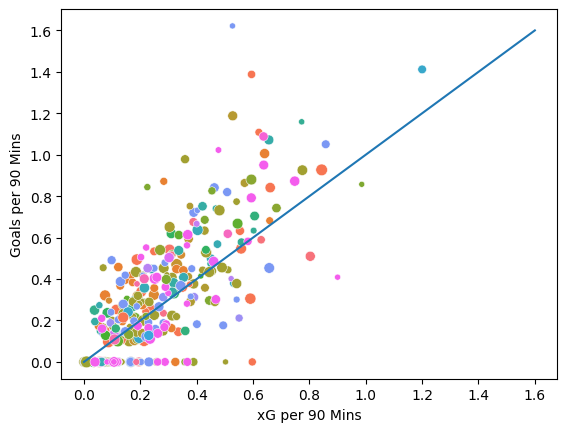

In [16]:
sns.scatterplot(data = df_forwards, x = 'xG_per_90', y = 'Gls_per_90', hue = 'Nation', size = 'Min')
plt.xlabel('xG per 90 Mins')
plt.ylabel('Goals per 90 Mins')
plt.legend().remove()
plt.plot([0,1.6],[0,1.6]);

In [17]:
""" = figure()
p.circle(x='xG_per_90', y='Gls_per_90',
         source=df_forwards,
         size=10, fill_color = 'Nation')

p.title.text = 'Attacking Efficiency'
p.xaxis.axis_label = 'Expected Goals per 90 Mins'
p.yaxis.axis_label = 'Goals per 90 Mins'

hover = HoverTool()
hover.tooltips=[
    ('Player', '@Player'),
    ('Gls per 90', '@Gls_per_90'),
    ('xG per 90', '@xG_per_90'),
    ('Minutes', '@Mins')
]

p.add_tools(hover)

show(p)"""